In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import pandas as pd
import time
import pickle
from pathlib import Path
import re
from model_1p7 import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='notebook', style='whitegrid', rc={"font.family": "DejaVu Serif"})

# Debug

In [2]:
pert = {'pert_start':1, 'pert_end':11, 'pert_value':0.2}
df, dff, sim, net = simulate('V', 0, 1, 0, 80, 'random', pert)

trial 1
trial 10
trial 20
trial 30
trial 40
trial 50
trial 60
trial 70
trial 80


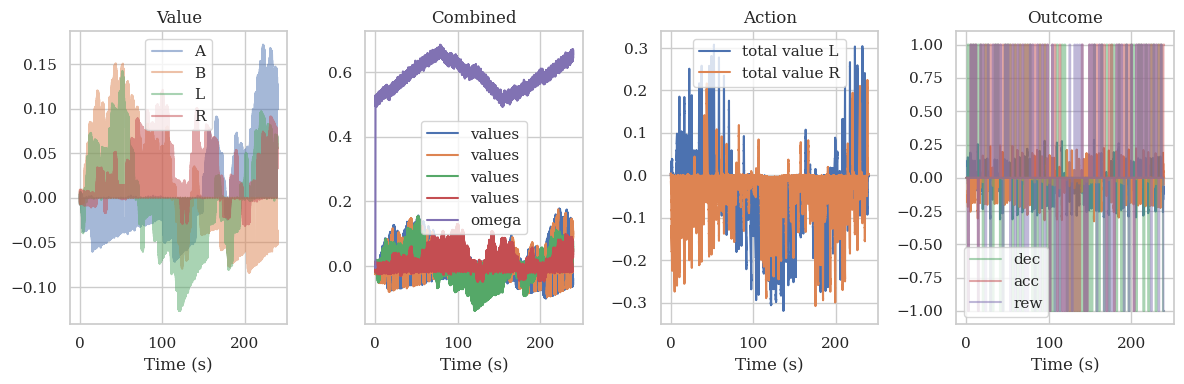

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, figsize=(12,4))
axes[0].plot(sim.trange(), sim.data[net.p_v][:,0], label='A', alpha=0.5)
axes[0].plot(sim.trange(), sim.data[net.p_v][:,1], label='B', alpha=0.5)
axes[0].plot(sim.trange(), sim.data[net.p_v][:,2], label='L', alpha=0.5)
axes[0].plot(sim.trange(), sim.data[net.p_v][:,3], label='R', alpha=0.5)
axes[1].plot(sim.trange(), sim.data[net.p_vwa][:,:4], label='values')
axes[1].plot(sim.trange(), sim.data[net.p_vwa][:,4], label='omega')
# axes[2].plot(sim.trange(), sim.data[net.p_vwa][:,4], label='vwa')
# axes[2].plot(sim.trange(), sim.data[net.p_vwa2][:,0], label='aL')
# axes[2].plot(sim.trange(), sim.data[net.p_vwa2][:,1], label='aR')
# axes[2].plot(sim.trange(), sim.data[net.p_w])
axes[2].plot(sim.trange(), sim.data[net.p_a][:,0], label='total value L')
axes[2].plot(sim.trange(), sim.data[net.p_a][:,1], label='total value R')
# axes[2].plot(sim.trange(), sim.data[net.p_thr], label='threshold')
axes[3].plot(sim.trange(), sim.data[net.p_ch])
axes[3].plot(sim.trange(), sim.data[net.p_dec][:,0], label='dec', alpha=0.5)
# axes[3].plot(sim.trange(), sim.data[net.p_dec][:,2], label='rt')
axes[3].plot(sim.trange(), sim.data[net.p_rew][:,3], label='acc', alpha=0.5)
axes[3].plot(sim.trange(), sim.data[net.p_rew][:,0], label='rew', alpha=0.5)
# axes[3].plot(sim.trange(), sim.data[net.p_ew])
# axes[3].plot(sim.trange(), sim.data[net.p_mask_learn])
# axes[0].set(xlim=[235,260])
axes[0].set(title='Value', xlabel="Time (s)")  # : 1s ITI, 1s Cue, 1s Rew
axes[1].set(title='Combined', xlabel="Time (s)")
axes[2].set(title='Action', xlabel="Time (s)")
axes[3].set(title='Outcome', xlabel="Time (s)")
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
plt.tight_layout()
plt.show()
# fig.savefig("plots/dynamics_2.jpg", dpi=600)

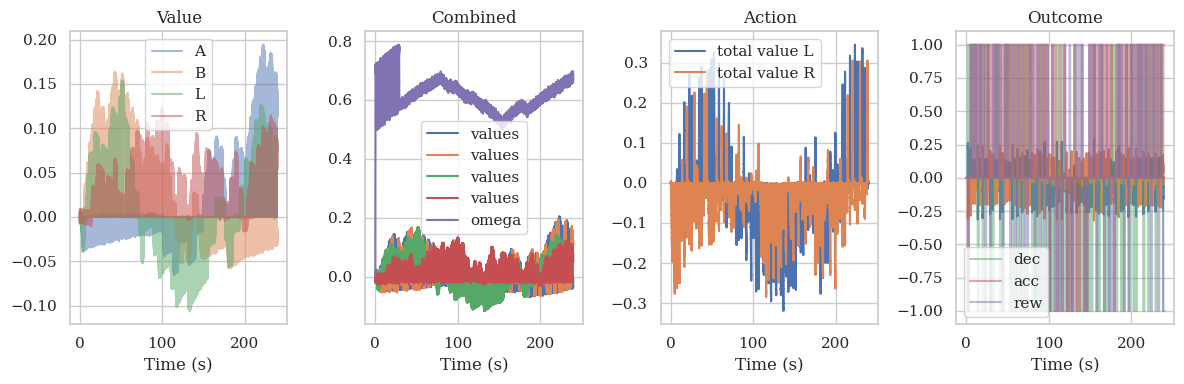

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, figsize=(12,4))
axes[0].plot(sim.trange(), sim.data[net.p_v][:,0], label='A', alpha=0.5)
axes[0].plot(sim.trange(), sim.data[net.p_v][:,1], label='B', alpha=0.5)
axes[0].plot(sim.trange(), sim.data[net.p_v][:,2], label='L', alpha=0.5)
axes[0].plot(sim.trange(), sim.data[net.p_v][:,3], label='R', alpha=0.5)
axes[1].plot(sim.trange(), sim.data[net.p_vwa][:,:4], label='values')
axes[1].plot(sim.trange(), sim.data[net.p_vwa][:,4], label='omega')
# axes[2].plot(sim.trange(), sim.data[net.p_vwa][:,4], label='vwa')
# axes[2].plot(sim.trange(), sim.data[net.p_vwa2][:,0], label='aL')
# axes[2].plot(sim.trange(), sim.data[net.p_vwa2][:,1], label='aR')
# axes[2].plot(sim.trange(), sim.data[net.p_w])
axes[2].plot(sim.trange(), sim.data[net.p_a][:,0], label='total value L')
axes[2].plot(sim.trange(), sim.data[net.p_a][:,1], label='total value R')
# axes[2].plot(sim.trange(), sim.data[net.p_thr], label='threshold')
axes[3].plot(sim.trange(), sim.data[net.p_ch])
axes[3].plot(sim.trange(), sim.data[net.p_dec][:,0], label='dec', alpha=0.5)
# axes[3].plot(sim.trange(), sim.data[net.p_dec][:,2], label='rt')
axes[3].plot(sim.trange(), sim.data[net.p_rew][:,3], label='acc', alpha=0.5)
axes[3].plot(sim.trange(), sim.data[net.p_rew][:,0], label='rew', alpha=0.5)
# axes[3].plot(sim.trange(), sim.data[net.p_ew])
# axes[3].plot(sim.trange(), sim.data[net.p_mask_learn])
# axes[0].set(xlim=[235,260])
axes[0].set(title='Value', xlabel="Time (s)")  # : 1s ITI, 1s Cue, 1s Rew
axes[1].set(title='Combined', xlabel="Time (s)")
axes[2].set(title='Action', xlabel="Time (s)")
axes[3].set(title='Outcome', xlabel="Time (s)")
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
plt.tight_layout()
plt.show()
# fig.savefig("plots/dynamics_2.jpg", dpi=600)

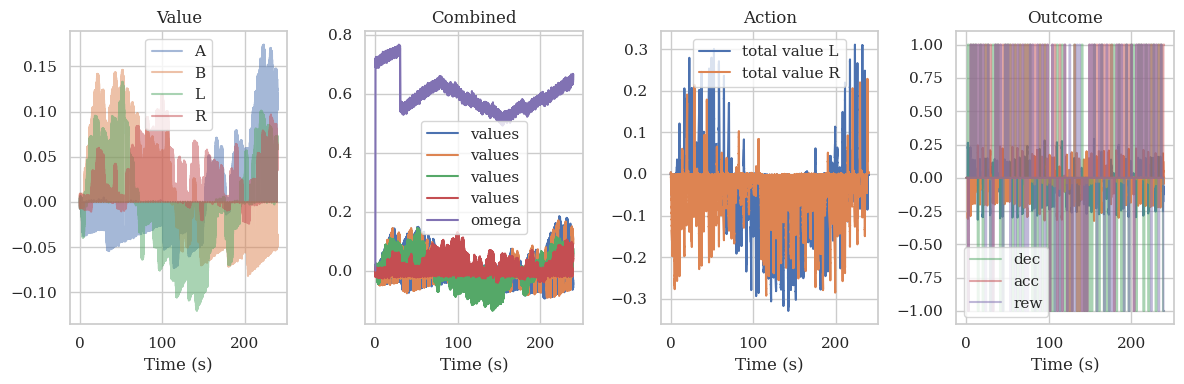

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, figsize=(12,4))
axes[0].plot(sim.trange(), sim.data[net.p_v][:,0], label='A', alpha=0.5)
axes[0].plot(sim.trange(), sim.data[net.p_v][:,1], label='B', alpha=0.5)
axes[0].plot(sim.trange(), sim.data[net.p_v][:,2], label='L', alpha=0.5)
axes[0].plot(sim.trange(), sim.data[net.p_v][:,3], label='R', alpha=0.5)
axes[1].plot(sim.trange(), sim.data[net.p_vwa][:,:4], label='values')
axes[1].plot(sim.trange(), sim.data[net.p_vwa][:,4], label='omega')
# axes[2].plot(sim.trange(), sim.data[net.p_vwa][:,4], label='vwa')
# axes[2].plot(sim.trange(), sim.data[net.p_vwa2][:,0], label='aL')
# axes[2].plot(sim.trange(), sim.data[net.p_vwa2][:,1], label='aR')
# axes[2].plot(sim.trange(), sim.data[net.p_w])
axes[2].plot(sim.trange(), sim.data[net.p_a][:,0], label='total value L')
axes[2].plot(sim.trange(), sim.data[net.p_a][:,1], label='total value R')
# axes[2].plot(sim.trange(), sim.data[net.p_thr], label='threshold')
axes[3].plot(sim.trange(), sim.data[net.p_ch])
axes[3].plot(sim.trange(), sim.data[net.p_dec][:,0], label='dec', alpha=0.5)
# axes[3].plot(sim.trange(), sim.data[net.p_dec][:,2], label='rt')
axes[3].plot(sim.trange(), sim.data[net.p_rew][:,3], label='acc', alpha=0.5)
axes[3].plot(sim.trange(), sim.data[net.p_rew][:,0], label='rew', alpha=0.5)
# axes[3].plot(sim.trange(), sim.data[net.p_ew])
# axes[3].plot(sim.trange(), sim.data[net.p_mask_learn])
# axes[0].set(xlim=[235,260])
axes[0].set(title='Value', xlabel="Time (s)")  # : 1s ITI, 1s Cue, 1s Rew
axes[1].set(title='Combined', xlabel="Time (s)")
axes[2].set(title='Action', xlabel="Time (s)")
axes[3].set(title='Outcome', xlabel="Time (s)")
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
plt.tight_layout()
plt.show()
# fig.savefig("plots/dynamics_2.jpg", dpi=600)

# Plotting

In [2]:
def adjust_df(df, do_acc=True, do_delta=True):
    if do_acc: df['acc'] = df['acc'].replace(-1, 0)
    emp = pd.read_pickle("data/empirical2.pkl")
    block_starts = emp[emp['trial'] == 1].copy()
    if do_delta:
        df['dv_let'] = df['vwa_a'] - df['vwa_b']
        df['dv_loc'] = df['vwa_l'] - df['vwa_r']
        df['dv_let_abs'] = np.abs(df['vwa_a'] - df['vwa_b'])
        df['dv_loc_abs'] = np.abs(df['vwa_l'] - df['vwa_r'])
        # df['dv_let'] = df['va'] - df['vb']
        # df['dv_loc'] = df['vl'] - df['vr']
        # df['dv_let_abs'] = np.abs(df['va'] - df['vb'])
        # df['dv_loc_abs'] = np.abs(df['vl'] - df['vr'])
    
    def classify(row):
        b = row['block']
        if 1 <= b <= 12:
            # Letter blocks: check if it starts with A or B
            start = row['cor_let']
            return f"let_{start}{'B' if start == 'A' else 'A'}"
        elif 13 <= b <= 24:
            # Location blocks: check if starts with left or right
            start_init = 'L' if row['cor_loc'] == 'left' else 'R'
            end_init = 'R' if start_init == 'L' else 'L'
            return f"loc_{start_init}{end_init}"
        return "unknown"

    block_starts['block_label'] = block_starts.apply(classify, axis=1)
    
    # Create a mapping dictionary {block_number: label}
    block_type_map = block_starts.set_index('block')['block_label'].to_dict()
    
    # 4. Apply labels to the main dataframe
    df['block_type'] = df['block'].map(block_type_map)
    
    # block_mapping = emp[['block', 'block_type']].drop_duplicates().set_index('block')['block_type']
    # df['block_type'] = df['block'].map(block_mapping)
    emp['rev'] = emp['trial'].astype(int) - emp['reversal_at_trial'].astype(int)
    join_keys = ['monkey', 'session', 'block', 'trial']
    extra_cols = ['rev', 'cor_let', 'cor_loc']
    df = df.merge(emp[join_keys + extra_cols], on=join_keys, how='left')
    return df

In [3]:
def plot_values(nef_data, x='rev'):
    target_blocks = ['loc_RL', 'loc_LR', 'let_AB', 'let_BA']
    pretty_labels = {
        'let_AB': 'What\nA \u2192 B',
        'let_BA': 'What\nB \u2192 A',
        'loc_LR': 'Where\nL \u2192 R',
        'loc_RL': 'Where\nR \u2192 L'
    }
    name_map = {'va': 'A', 'vb': 'B', 'vl': 'L', 'vr': 'R'}
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 5), sharex=True, sharey="col")
    titles = ['Values', r"$\omega$", 'RT']
    columns_to_plot = [['va', 'vb', 'vl', 'vr'], ['w'], ['tdec']]
    for row_idx, b_type in enumerate(target_blocks):
        df = nef_data[nef_data['block_type'] == b_type].copy()
        if df.empty: continue
        for col_idx, cols in enumerate(columns_to_plot):
            ax = axes[row_idx, col_idx]
            plot_df = df.query("rev != 0")
            for metric in cols:
                label_name = name_map.get(metric, metric)
                sns.lineplot(data=plot_df, x=x, y=metric, ax=ax, label=label_name)
            ax.axvline(0, color='black', linestyle='--', alpha=0.3)
            ax.set(xlim=[-45, 45], xticks=[-40, 0, 40], ylabel=None)
            ax.xaxis.grid(False)
            if col_idx == 0:
                ax.set_ylabel(pretty_labels.get(b_type, b_type), rotation=0, labelpad=40, verticalalignment='center')
            if col_idx==0 and row_idx==0:
                ax.legend(ncol=2)
            else:
                if ax.get_legend(): ax.get_legend().remove()
            if row_idx == 0:
                ax.set_title(titles[col_idx], fontweight='bold', pad=20)
            if row_idx == len(target_blocks)-1:
                ax.set(xlabel="Trial (reversal)")
    plt.tight_layout()
    plt.show()
    fig.savefig("plots/values.pdf")
    fig.savefig("plots/values.jpg", dpi=600)

In [4]:
def plot_performance_omega(nef_data, rl_data, label, window_size=7, x_ratio=0.7):
    emp = pd.read_pickle("data/empirical2.pkl")
    emp['rev'] = emp['trial'].astype(int) - emp['reversal_at_trial'].astype(int)
    type_map = {'let_AB': 'what', 'let_BA': 'what', 'loc_LR': 'where', 'loc_RL': 'where'}
    for i, dataset in enumerate([emp, nef_data, rl_data]):
        dataset['super_type'] = dataset['block_type'].map(type_map).fillna(dataset['block_type'])
        dataset['after_rev'] = dataset['rev'] >= 0
        if i<2:
            target_col = 'monkey_accuracy' if 'monkey_accuracy' in dataset.columns else 'acc'
            dataset['smoothed_acc'] = dataset.groupby(['monkey', 'super_type', 'session', 'block', 'after_rev'])[target_col].transform(lambda x: x.rolling(window=window_size, center=True, min_periods=1).mean())

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), sharex=True,  sharey='row', gridspec_kw={'height_ratios': [x_ratio, 1 - x_ratio]})
    
    sns.lineplot(data=emp, x='rev', y='smoothed_acc', hue='super_type', hue_order=['what', 'where'], ax=axes[0][0])
    axes[0][0].set_title('Empirical Data')
    axes[0][0].set(xlim=[-45, 45], ylabel='Task Performance', ylim=[0, 1])
    axes[0][0].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[0][0].legend(title='Block Type')
    axes[0][0].xaxis.grid(False)  # Explicitly disable vertical lines

    sns.lineplot(data=nef_data, x='rev', y='smoothed_acc', hue='super_type', hue_order=['what', 'where'], ax=axes[0][1])
    axes[0][1].set_title(f'NEF Model ({label})')
    # axes[0][1].set(xlabel='Trial Relative to Reversal', ylim=[0, 1])
    axes[0][1].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[0][1].get_legend().remove()
    axes[0][1].xaxis.grid(False)  # Explicitly disable vertical lines

    sns.lineplot(data=rl_data, x='rev', y='omega', hue='super_type', hue_order=['what', 'where'], ax=axes[1][0])
    axes[1][0].set(xlabel='Trial Relative to Reversal', ylabel=r"Decoded $\omega$", ylim=[0, 1])
    axes[1][0].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[1][0].get_legend().remove()
    axes[1][0].xaxis.grid(False)  # Explicitly disable vertical lines

    sns.lineplot(data=nef_data, x='rev', y='w', hue='super_type', hue_order=['what', 'where'], ax=axes[1][1])
    axes[1][1].set(xlabel='Trial Relative to Reversal', ylim=[0, 1])
    axes[1][1].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[1][1].get_legend().remove()
    axes[1][1].xaxis.grid(False)  # Explicitly disable vertical lines

    plt.tight_layout()
    plt.show()
    fig.savefig(f"plots/performance_omega_{label}.pdf")
    fig.savefig(f"plots/performance_omega_{label}.jpg", dpi=600)

In [5]:
def plot_control_inhibited(control, inhibited, rl_data, window_size=7, x_ratio=0.7):
    emp = pd.read_pickle("data/empirical2.pkl")
    emp['rev'] = emp['trial'].astype(int) - emp['reversal_at_trial'].astype(int)
    type_map = {'let_AB': 'what', 'let_BA': 'what', 'loc_LR': 'where', 'loc_RL': 'where'}
    control['perturbation'] = 'control'
    inhibited['perturbation'] = 'inhibited'
    nef_data = pd.concat([control, inhibited], ignore_index=True)
    for i, dataset in enumerate([emp, nef_data, rl_data]):
        dataset['block type'] = dataset['block_type'].map(type_map).fillna(dataset['block_type'])
        dataset['after_rev'] = dataset['rev'] >= 0
        if i<2:
            target_col = 'monkey_accuracy' if 'monkey_accuracy' in dataset.columns else 'acc'
            dataset['smoothed_acc'] = dataset.groupby(['monkey', 'block type', 'session', 'block', 'after_rev'])[target_col].transform(lambda x: x.rolling(window=window_size, center=True, min_periods=1).mean())

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4), sharex=True,  sharey='row', gridspec_kw={'height_ratios': [x_ratio, 1 - x_ratio]})
    
    sns.lineplot(data=emp, x='rev', y='smoothed_acc', hue='block type', hue_order=['what', 'where'], ax=axes[0][0])
    axes[0][0].set_title('Empirical Data')
    axes[0][0].set(xlim=[-45, 45], ylabel='Task Performance', ylim=[0, 1])
    axes[0][0].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[0][0].get_legend().remove()
    axes[0][0].xaxis.grid(False)  # Explicitly disable vertical lines

    sns.lineplot(data=nef_data, x='rev', y='smoothed_acc', hue='block type', hue_order=['what', 'where'], style='perturbation', ax=axes[0][1])
    axes[0][1].set_title('NEF Data')
    # axes[0][1].set(xlabel='Trial Relative to Reversal', ylim=[0, 1])
    axes[0][1].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[0][1].get_legend().remove()
    axes[0][1].xaxis.grid(False)  # Explicitly disable vertical lines
    axes[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    sns.lineplot(data=rl_data, x='rev', y='omega', hue='block type', hue_order=['what', 'where'], ax=axes[1][0])
    axes[1][0].set(xlabel='Trial Relative to Reversal', ylabel=r"Decoded $\omega$", ylim=[0, 1])
    axes[1][0].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[1][0].get_legend().remove()
    axes[1][0].xaxis.grid(False)  # Explicitly disable vertical lines

    sns.lineplot(data=nef_data, x='rev', y='w', hue='block type', hue_order=['what', 'where'], style='perturbation', ax=axes[1][1])
    axes[1][1].set(xlabel='Trial Relative to Reversal', ylim=[0, 1])
    axes[1][1].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[1][1].get_legend().remove()
    axes[1][1].xaxis.grid(False)  # Explicitly disable vertical lines

    plt.tight_layout()
    plt.show()
    fig.savefig(f"plots/control_vs_inhibited.pdf")
    fig.savefig(f"plots/control_vs_inhibited.jpg", dpi=600)

In [6]:
def plot_control_pos_neg(control, pos, neg, rl_data, window_size=7, x_ratio=0.7):
    emp = pd.read_pickle("data/empirical2.pkl")
    emp['rev'] = emp['trial'].astype(int) - emp['reversal_at_trial'].astype(int)
    type_map = {'let_AB': 'what', 'let_BA': 'what', 'loc_LR': 'where', 'loc_RL': 'where'}
    control['perturbation'] = 'control'
    pos['perturbation'] = 'positive'
    neg['perturbation'] = 'negative'
    nef_data = pd.concat([control, pos, neg], ignore_index=True)
    for i, dataset in enumerate([emp, nef_data, rl_data]):
        dataset['block type'] = dataset['block_type'].map(type_map).fillna(dataset['block_type'])
        dataset['after_rev'] = dataset['rev'] >= 0
        if i<2:
            target_col = 'monkey_accuracy' if 'monkey_accuracy' in dataset.columns else 'acc'
            dataset['smoothed_acc'] = dataset.groupby(['monkey', 'block type', 'session', 'block', 'after_rev'])[target_col].transform(lambda x: x.rolling(window=window_size, center=True, min_periods=1).mean())

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4), sharex=True,  sharey='row', gridspec_kw={'height_ratios': [x_ratio, 1 - x_ratio]})

    sns.lineplot(data=emp, x='rev', y='smoothed_acc', hue='block type', hue_order=['what', 'where'], ax=axes[0][0])
    axes[0][0].set_title('Empirical Data')
    axes[0][0].set(xlim=[-45, 45], ylabel='Task Performance', ylim=[0, 1])
    axes[0][0].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[0][0].get_legend().remove()
    axes[0][0].xaxis.grid(False)  # Explicitly disable vertical lines

    sns.lineplot(data=nef_data, x='rev', y='smoothed_acc', hue='block type', hue_order=['what', 'where'], style='perturbation', ax=axes[0][1])
    axes[0][1].set_title('NEF Data')
    # axes[0][1].set(xlabel='Trial Relative to Reversal', ylim=[0, 1])
    axes[0][1].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[0][1].get_legend().remove()
    axes[0][1].xaxis.grid(False)  # Explicitly disable vertical lines
    axes[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    sns.lineplot(data=rl_data, x='rev', y='omega', hue='block type', hue_order=['what', 'where'], ax=axes[1][0])
    axes[1][0].set(xlabel='Trial Relative to Reversal', ylabel=r"Decoded $\omega$", ylim=[0, 1])
    axes[1][0].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[1][0].get_legend().remove()
    axes[1][0].xaxis.grid(False)  # Explicitly disable vertical lines

    sns.lineplot(data=nef_data, x='rev', y='w', hue='block type', hue_order=['what', 'where'], style='perturbation', ax=axes[1][1])
    axes[1][1].set(xlabel='Trial Relative to Reversal', ylim=[0, 1])
    axes[1][1].axvline(0, color='black', linestyle='--', alpha=0.3)
    axes[1][1].get_legend().remove()
    axes[1][1].xaxis.grid(False)  # Explicitly disable vertical lines

    plt.tight_layout()
    plt.show()
    fig.savefig(f"plots/control_vs_posneg.pdf")
    fig.savefig(f"plots/control_vs_posneg.jpg", dpi=600)

# Perturbation during training

In [141]:
control = adjust_df(pd.read_pickle("data/nef/control/nef_data.pkl.xz"))
pert = adjust_df(pd.read_pickle("data/nef/nef_data.pkl.xz")).query("pert==0.0")
inh = adjust_df(pd.read_pickle("data/nef/inh/nef_data.pkl.xz"))
pos = adjust_df(pd.read_pickle("data/nef/pos/nef_data.pkl.xz"))
neg = adjust_df(pd.read_pickle("data/nef/neg/nef_data.pkl.xz"))
rl = adjust_df(pd.read_pickle("data/rl_values.pkl"), False, False)

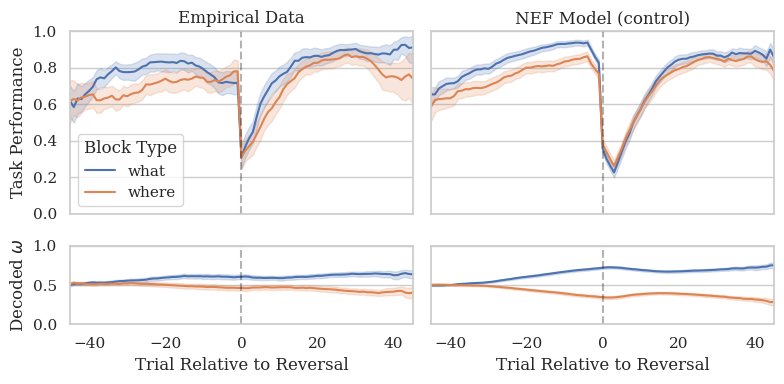

In [49]:
plot_performance_omega(control, rl, label='control')

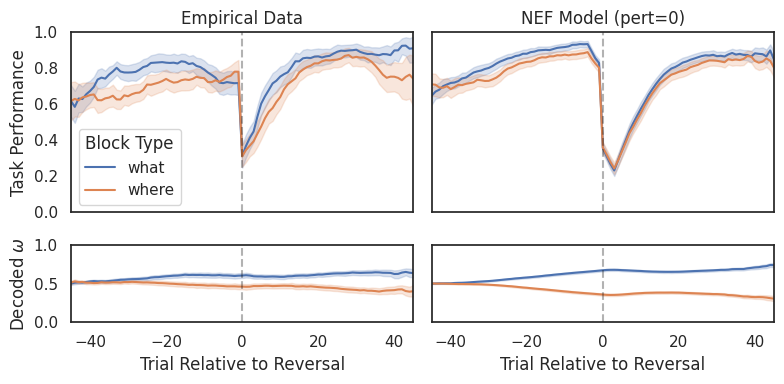

In [77]:
plot_performance_omega(pert, rl, label='pert=0')

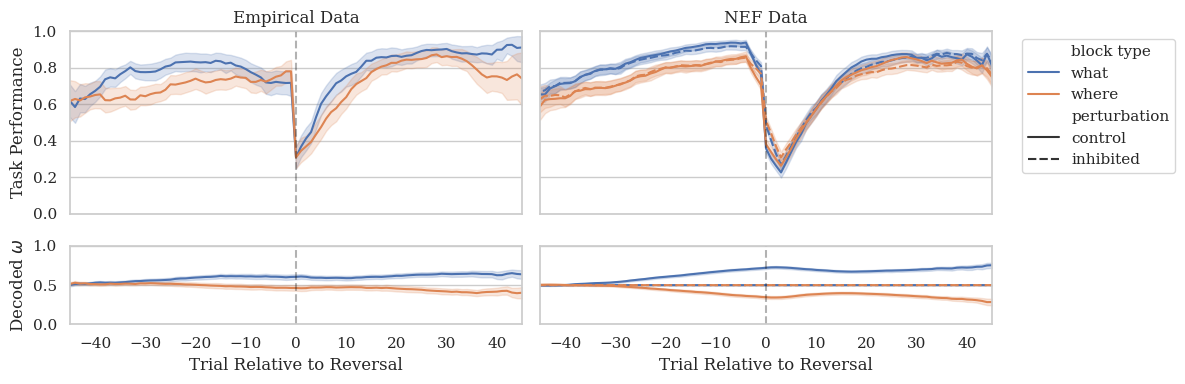

In [50]:
plot_control_inhibited(control, inh, rl)

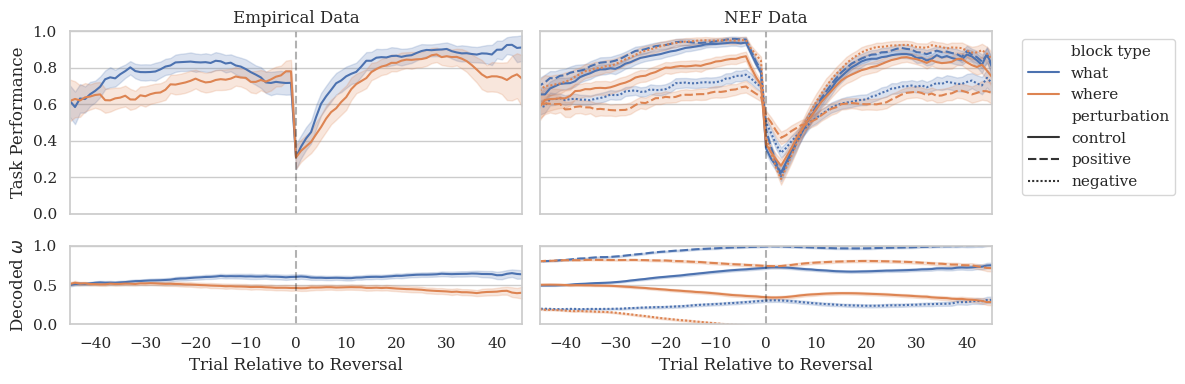

In [56]:
plot_control_pos_neg(control, pos, neg, rl)

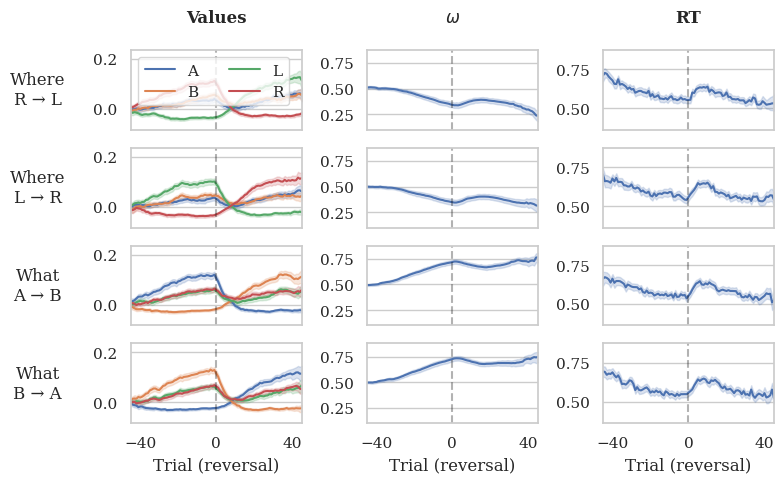

In [33]:
plot_values(control)

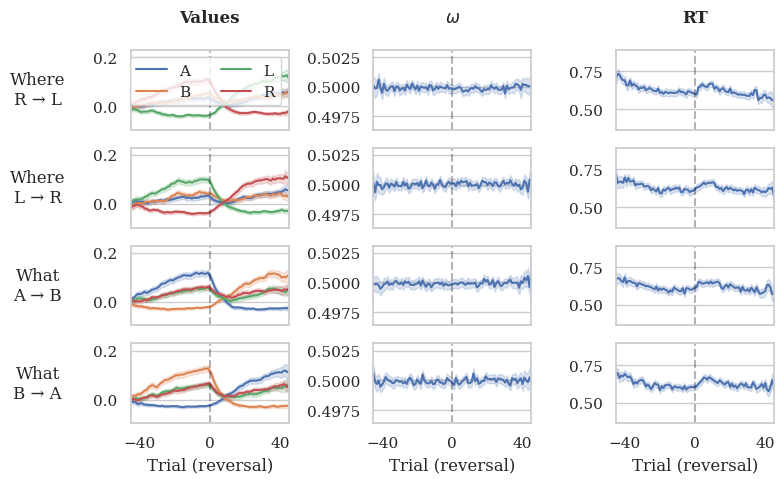

In [57]:
plot_values(inh)

# Ramping

In [51]:
def load_adjust_full(df):
    df['acc'] = df['acc'].replace(-1, 0)
    df['trial'] = (np.floor(df['time'] / 3.0) + 1).astype(int)
    emp = pd.read_pickle("data/empirical2.pkl")
    emp_subset = emp[['monkey', 'session', 'block', 'trial', 'cor_loc', 'cor_let', 'block_type', 'reversal_at_trial']].drop_duplicates()
    join_keys = ['monkey', 'session', 'block', 'trial']
    df = df.merge(emp_subset, on=join_keys, how='left')
    df['rev'] = df['trial'] - df['reversal_at_trial']
    is_left = (df['cor_loc'] == 'left')
    df['acor'] = np.where(is_left, df['al'], df['ar'])
    df['ainc'] = np.where(is_left, df['ar'], df['al'])
    df['t_since_cue'] = df['time'] % 3.0 - 1.0
    df['da'] = df['acor'] - df['ainc']
    for col in ['monkey', 'block_type', 'cor_loc', 'cor_let']:
        df[col] = df[col].astype('category')
    return df

In [52]:
def plot_ramp(df, label, trial_start=38, trial_end=45):
    df = df.query("@trial_start <= rev < @trial_end").copy()
    type_map = {'what': 'What Blocks', 'where': 'Where Blocks'}
    df['super_type'] = df['block_type'].map(type_map)
    categories = ['Where Blocks', 'What Blocks']
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True, sharex=True)
    for i, cat in enumerate(categories):
        data_subset = df[df['super_type'] == cat]
        sns.lineplot(data=data_subset, x='t_since_cue', y='da', ax=axes[i], color=palette[0], alpha=1)
        # sns.lineplot(data=data_subset, x='t_since_cue', y='acor', ax=axes[i], color=palette[1], alpha=0.3, label='a correct')
        # sns.lineplot(data=data_subset, x='t_since_cue', y='ainc', ax=axes[i], color=palette[2], alpha=0.3, label='a incorrect')
        # sns.lineplot(data=data_subset, x='t_since_cue', y='thr', ax=axes[i], color=palette[3], alpha=0.3, label='a thr')
        axes[i].set_title(cat+f" ({label})", fontweight='bold', fontsize=14)
        axes[i].set(xlabel='Time from Cue (s)', ylabel="Action Value\n(v correct - v incorrect)" if i == 0 else None)
        axes[i].axvline(0, color='black', linestyle='--', alpha=0.3)
        axes[i].set_xticks(np.linspace(-1,1,5))
        axes[i].set_xlim([-1, 1])
    # axes[0].set(ylim=[0,0.7])
    # axes[1].set(ylim=[0,0.2], yticks=[0.0, 0.05, 0.1, 0.15, 0.2])
    # axes[0].legend()
    plt.tight_layout()
    plt.show()
    fig.savefig(f"plots/ramp_{label}.pdf")
    fig.savefig(f"plots/ramp_{label}.jpg", dpi=600)

In [53]:
control_full = load_adjust_full(pd.read_pickle("data/nef/control/nef_data_full.pkl.xz"))
inh_full = load_adjust_full(pd.read_pickle("data/nef/inh/nef_data_full.pkl.xz"))
pos_full = load_adjust_full(pd.read_pickle("data/nef/pos/nef_data_full.pkl.xz"))
neg_full = load_adjust_full(pd.read_pickle("data/nef/neg/nef_data_full.pkl.xz"))

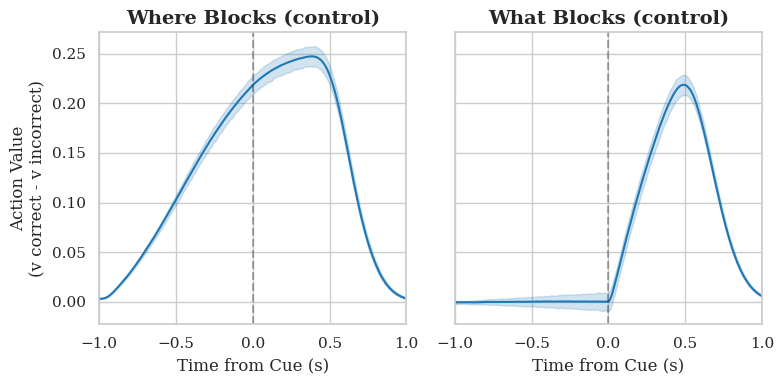

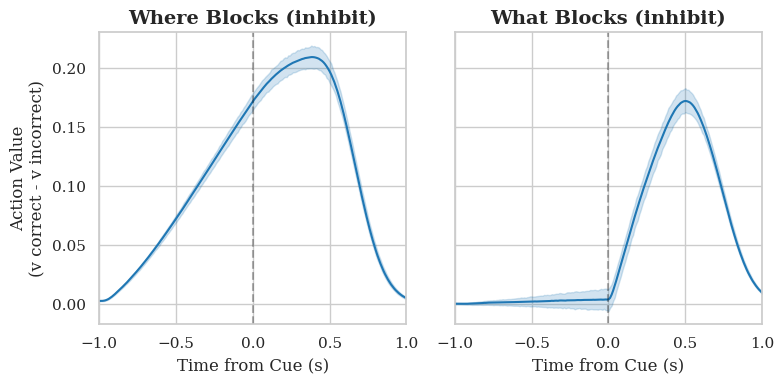

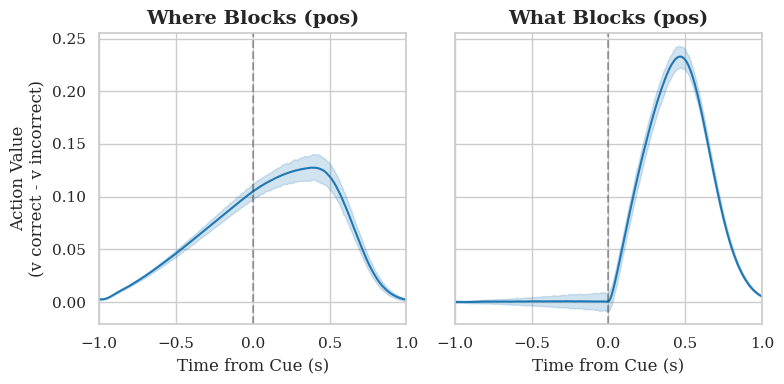

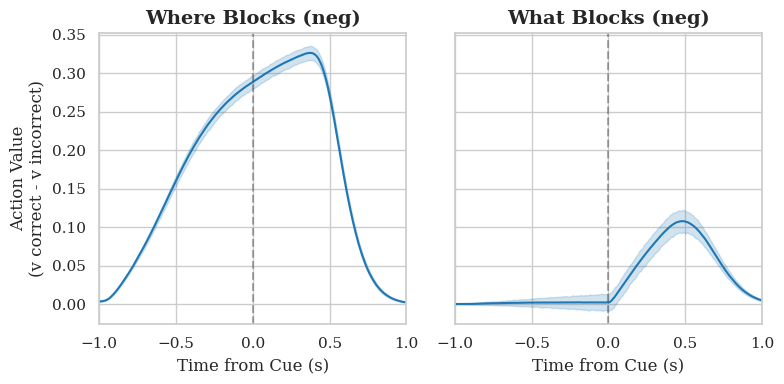

In [54]:
plot_ramp(control_full, "control")
plot_ramp(inh_full, "inhibit")
plot_ramp(pos_full, "pos")
plot_ramp(neg_full, "neg")

# Decoding internal states and actions under perturbation

## DV_let and DV_loc

In [92]:
pert = adjust_df(pd.read_pickle("data/nef/nef_data_pert.pkl.xz"))

In [38]:
def plot_dv_decoding(pert):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
    scatter_settings = {'alpha': 0.3, 's': 10}
    perts = [0.0, -0.1, -0.2, 0.1, 0.2]
    labels = ["control", "-0.1", "-0.2", "0.1", "0.2"]
    x_data = pert.query("pert==0.0")['dv_let']
    x_data2 = pert.query("pert==0.0")['dv_loc']
    for i, p in enumerate(perts):
        y_data = pert.query(f"pert=={p}")['dv_let']
        y_data2 = pert.query(f"pert=={p}")['dv_loc']
        sns.regplot(x=x_data, y=y_data, ax=axes[0], color=palette[i], label=labels[i], scatter_kws=scatter_settings)
        sns.regplot(x=x_data2, y=y_data2, ax=axes[1], color=palette[i], label=labels[i], scatter_kws=scatter_settings)
    axes[0].set(ylabel=r'$\Delta V_{let}$ (control)', xlabel=r'$\Delta V_{let}$ (perturbed)', xlim=[-0.4, 0.4], ylim=[-0.4, 0.4])
    axes[1].set(ylabel=r'$\Delta V_{loc}$ (control)', xlabel=r'$\Delta V_{loc}$ (perturbed)', xlim=[-0.4, 0.4], ylim=[-0.4, 0.4])
    axes[0].legend()
    plt.tight_layout()
    plt.show()

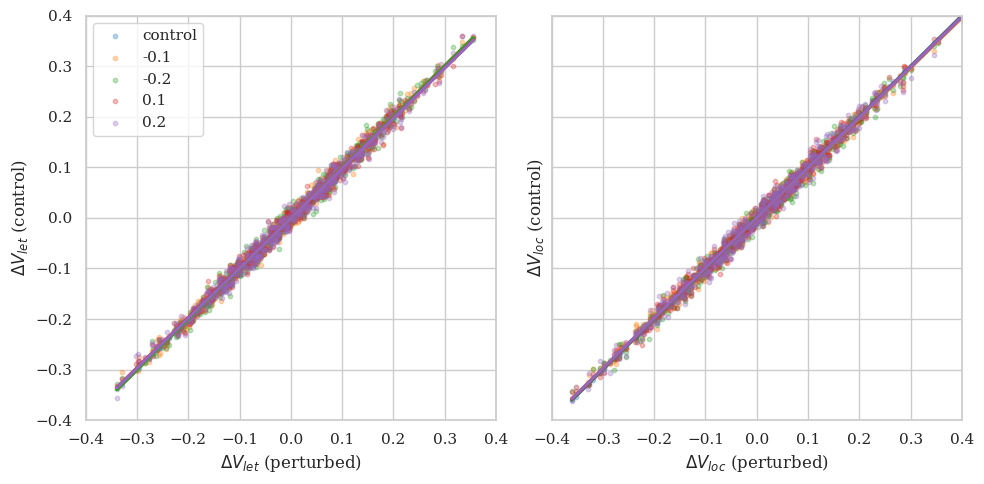

In [39]:
plot_dv_decoding(pert)

## a_L and a_R

In [96]:
def plot_action_decoding(pert):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
    scatter_settings = {'alpha': 0.3, 's': 10}
    perts = [0.0, -0.1, -0.2, 0.1, 0.2]
    labels = ["control", "-0.1", "-0.2", "0.1", "0.2"]
    x_data = pert.query("pert==0.0")['al']
    x_data2 = pert.query("pert==0.0")['ar']
    for i, p in enumerate(perts):
        y_data = pert.query(f"pert=={p}")['al']
        y_data2 = pert.query(f"pert=={p}")['ar']
        sns.regplot(x=x_data, y=y_data, ax=axes[0], color=palette[i], label=labels[i], scatter_kws=scatter_settings)
        sns.regplot(x=x_data2, y=y_data2, ax=axes[1], color=palette[i], label=labels[i], scatter_kws=scatter_settings)
    axes[0].set(ylabel=r'$a_{L}$ (control)', xlabel=r'$a_{L}$ (perturbed)')
    axes[1].set(ylabel=r'$a_{R}$ (control)', xlabel=r'$a_{R}$ (perturbed)')
    axes[0].legend()
    plt.tight_layout()
    plt.show()

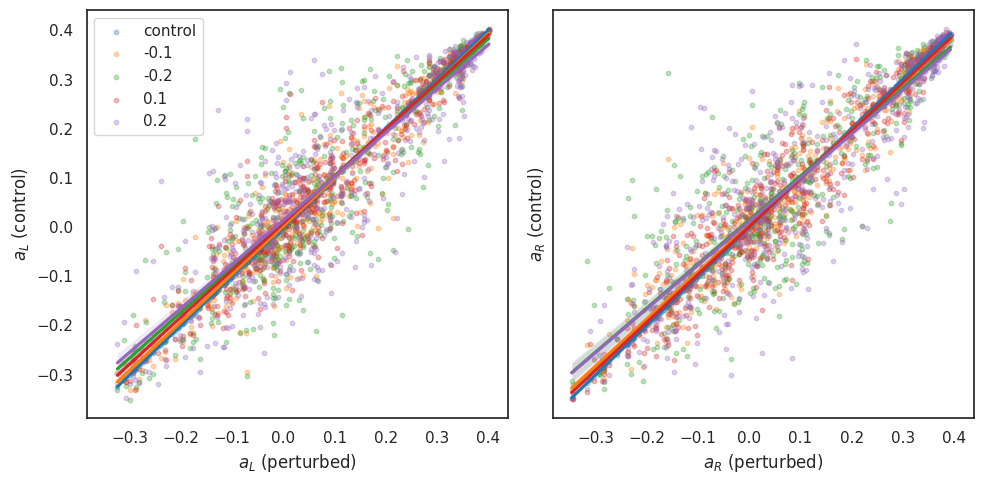

In [97]:
plot_action_decoding(pert)

In [106]:
def plot_action_decoding2(pert):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6), sharex=True, sharey=True)
    scatter_settings = {'alpha': 0.3, 's': 10}
    perts = [0.0, -0.1, -0.2, 0.1, 0.2]
    labels = ["control", "-0.1", "-0.2", "0.1", "0.2"]
    x_data = pert.query("pert==0.0")['al']
    x_data2 = pert.query("pert==0.0")['ar']
    for i, p in enumerate(perts):
        y_data = pert.query(f"pert=={p}")['al']
        y_data2 = pert.query(f"pert=={p}")['ar']
        sns.regplot(x=x_data, y=y_data, ax=axes[0][i], color=palette[i], label=labels[i], scatter_kws=scatter_settings)
        sns.regplot(x=x_data2, y=y_data2, ax=axes[1][i], color=palette[i], label=labels[i], scatter_kws=scatter_settings)
        axes[0][i].set(xlabel=r'$a_{L}$ (perturbed)', ylabel=None, title=f'Perturb={p}')
        axes[1][i].set(xlabel=r'$a_{R}$ (perturbed)', ylabel=None)
    axes[0][0].set(ylabel=r'$a_{L}$ (control)')
    axes[1][0].set(ylabel=r'$a_{R}$ (control)')
    plt.tight_layout()
    plt.show()

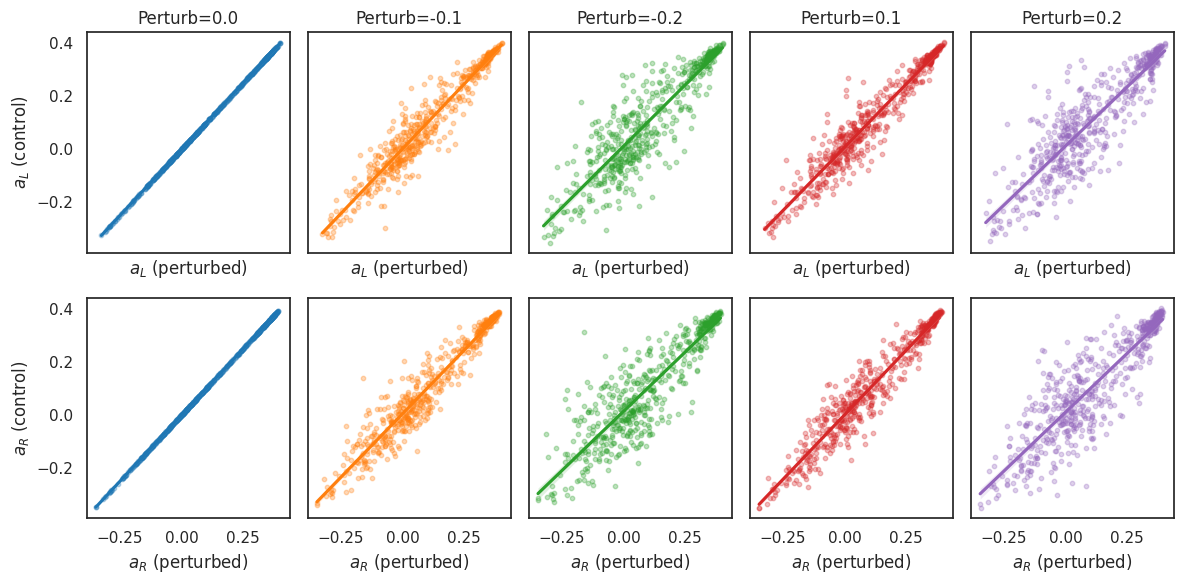

In [107]:
plot_action_decoding2(pert)

## Decision

In [68]:
def plot_error_probability(df):
    p2 = [palette[1], palette[2], palette[0], palette[3], palette[4]]
    df = df.copy()
    df['trial_id'] = df.groupby('pert').cumcount()
    pivot_df = df.pivot(index='trial_id', columns='pert', values='dec')
    results = []
    control_col = 0.0
    all_perts = sorted(pivot_df.columns) 
    for p in all_perts:
        is_different = (pivot_df[control_col] != pivot_df[p])
        prob_diff = is_different.mean()
        results.append({'Perturbation': p,'Percentage': prob_diff * 100})
    plot_df = pd.DataFrame(results)
    plt.figure(figsize=(8, 5))
    sns.set_style("white")
    ax = sns.barplot(data=plot_df, x='Perturbation', y='Percentage', hue='Perturbation', palette=p2)
    # ax.legend(title="Perturbation", loc='upper center')
    ax.get_legend().remove()
    for p_bar in ax.patches:
        height = p_bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', 
                    (p_bar.get_x() + p_bar.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontsize=10, weight='bold')
    ax.set(ylabel="Percent of Trials Different (%)", xlabel="Perturbation Level ($w$)")
    current_max = plot_df['Percentage'].max()
    ax.set_ylim(0, max(current_max * 1.2, 10))
    sns.despine()
    plt.tight_layout()
    plt.show()

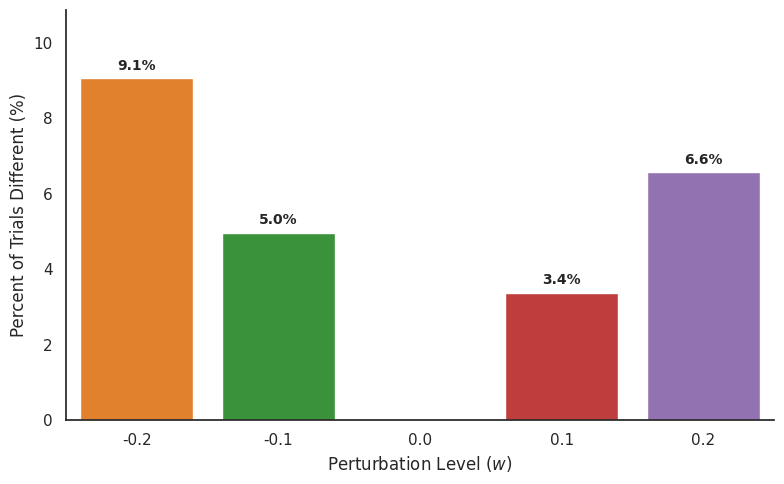

In [69]:
plot_error_probability(pert)

## deltaV vs omega

In [170]:
def plot_dv_vs_omega(df, x_bins = np.linspace(0.2,0.8,7), sharex=True, sharey=True):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
    sns.regplot(df, x='w', y='dv_let_abs', ax=axes[0], x_bins=x_bins, color=palette[0], fit_reg=False, scatter_kws={'s':5})
    sns.regplot(df, x='w', y='dv_loc_abs', ax=axes[1], x_bins=x_bins, color=palette[0], fit_reg=False, scatter_kws={'s':5})
    axes[0].set(xlabel='omega', title=r"abs($v_A - v_B$)", ylabel=r"$|\Delta V|$", xticks=x_bins, xlim=[x_bins[0]-0.1, x_bins[-1]+0.1])
    axes[1].set(xlabel='omega', title=r"abs($v_L - v_R$)", ylabel=None, yticks=[], xticks=x_bins, xlim=[x_bins[0]-0.1, x_bins[-1]+0.1])
    plt.tight_layout()
    plt.show()

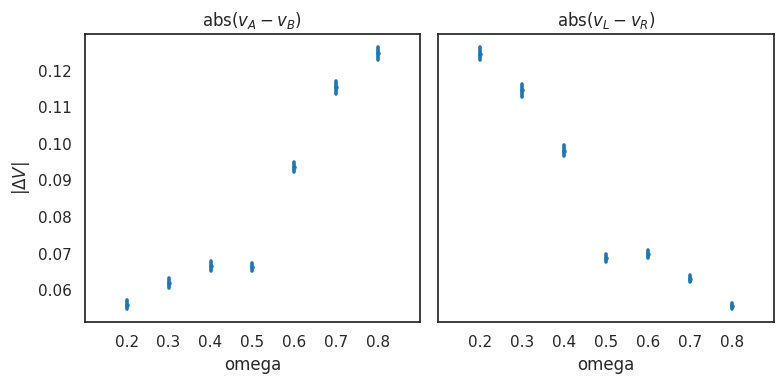

In [171]:
plot_dv_vs_omega(control)

# Decoding from full perturbation runs

In [7]:
pert_range = adjust_df(pd.read_pickle("data/nef/pert_range/nef_data.pkl.xz"))

In [13]:
pert_range.columns

Index(['monkey', 'session', 'block', 'seed', 'trial', 'va', 'vb', 'vl', 'vr',
       'w', 'vwa_a', 'vwa_b', 'vwa_l', 'vwa_r', 'vwa_w', 'al', 'ar', 'dec',
       'tdec', 'thr', 'rew', 'acc', 'pert_start', 'pert_end', 'pert_value',
       'dv_let', 'dv_loc', 'dv_let_abs', 'dv_loc_abs', 'block_type', 'rev',
       'cor_let', 'cor_loc'],
      dtype='object')

## Looking at the trial when perturbation was applied, regress dv_let and dv_loc in perturbed and unperturbed case
Then further split by omega bin

In [71]:
def plot_dv_decoding_by_omega(pert_range, omega_bins=np.linspace(0.2,0.8,6), ahead=[0,1], pert_starts=np.arange(1, 91, 10)):
    fig, axes = plt.subplots(nrows=2, ncols=len(omega_bins)-1, figsize=(12, 5), sharex=True, sharey=True)
    perts = pert_range['pert_value'].unique()
    start_offset, end_offset = ahead[0], ahead[1]
    df = pert_range.query("pert_start + @start_offset <= trial < pert_start + @end_offset & pert_start in @pert_starts")
    identifiers = ['monkey', 'session', 'block', 'trial']
    for j in range(len(omega_bins)-1):
        for row in range(2):
            axes[row][j].plot([-0.4, 0.4], [-0.4, 0.4], color='gray', linestyle='--', linewidth=1, zorder=0)
        w_min, w_max = omega_bins[j], omega_bins[j+1]
        df_w = df.query("pert_value == 0.0 & @w_min < w < @w_max")
        n_samples = len(df_w)
        for i, p in enumerate(perts):
            df_p = df.query("pert_value == @p")
            aligned = pd.merge(df_w, df_p, on=identifiers, suffixes=('_base', '_pert'))
            x_data, x_data2 = aligned['dv_let_base'], aligned['dv_loc_base']
            y_data, y_data2 = aligned['dv_let_pert'], aligned['dv_loc_pert']
            if not aligned.empty:
                sns.regplot(x=x_data, y=y_data, ax=axes[0][j], color=palette[i], label=p, scatter_kws={'alpha': 0.3, 's': 10})
                sns.regplot(x=x_data2, y=y_data2, ax=axes[1][j], color=palette[i], label=p, scatter_kws={'alpha': 0.3, 's': 10})
        axes[0][j].set(title=f"{w_min:.2}<w<{w_max:.2}\n(n={n_samples})", ylabel=None, xlabel=r'$\Delta V_{let}$ (pert)')
        axes[1][j].set(ylabel=None, xlabel=r'$\Delta V_{loc}$ (pert)')
    axes[0][0].set(ylabel=r'$\Delta V_{let}$ (control)', xlim=[-0.4, 0.4], ylim=[-0.4, 0.4], xticks=[-0.4, 0, 0.4], yticks=[-0.4,0,0.4])
    axes[1][0].set(ylabel=r'$\Delta V_{loc}$ (control)', xlim=[-0.4, 0.4], ylim=[-0.4, 0.4], xticks=[-0.4, 0, 0.4], yticks=[-0.4,0,0.4])
    axes[0][0].legend(title='Perturbation')
    plt.tight_layout()
    plt.show()

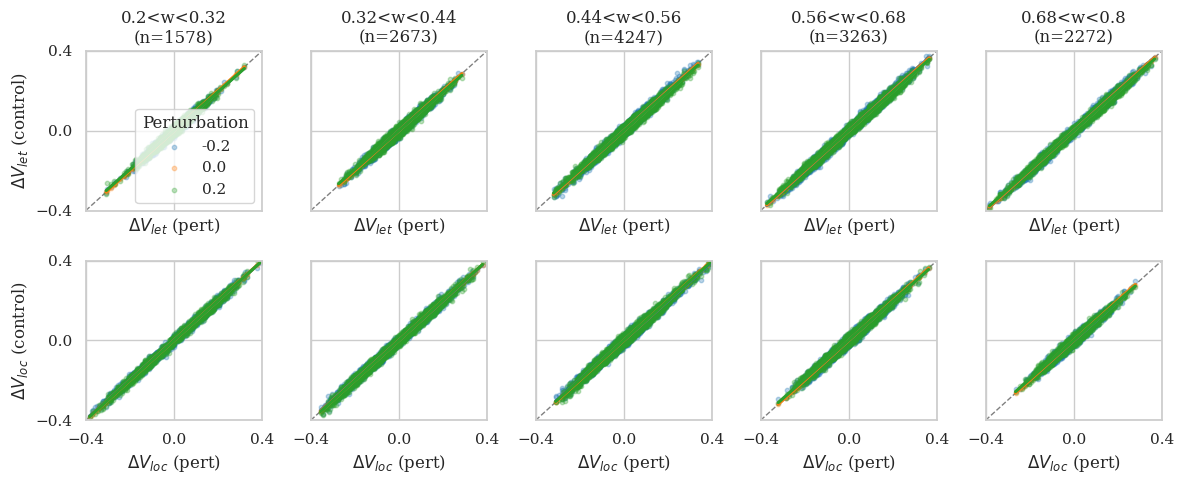

In [128]:
plot_dv_decoding_by_omega(pert_range, ahead=[0,10])

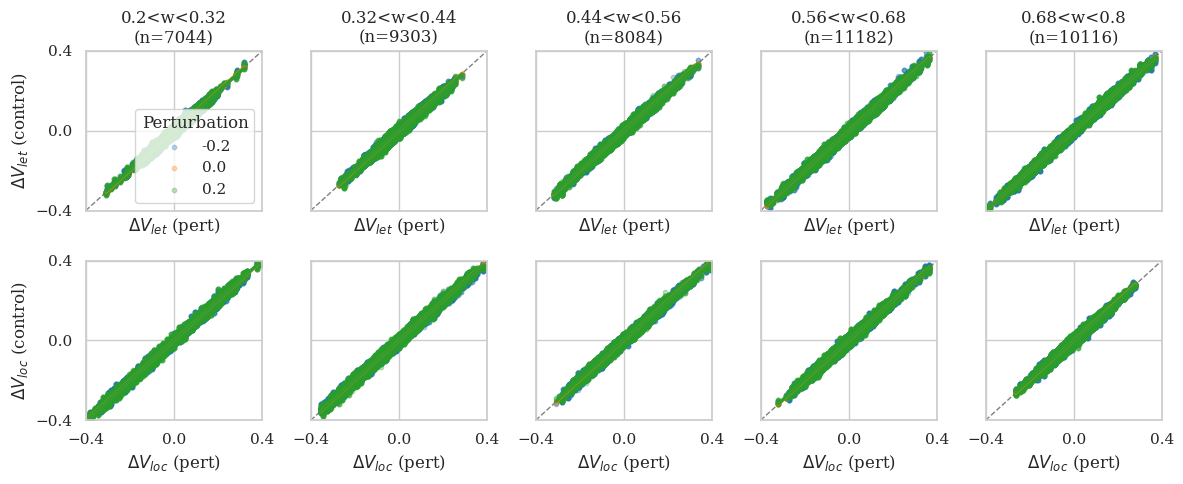

In [129]:
plot_dv_decoding_by_omega(pert_range, ahead=[10,70])

In [125]:
def plot_error_probability_by_omega(partial, omega_bins=np.linspace(0.2, 0.8, 6), ahead=[0,1], pert_starts=np.arange(1,91,10)):
    fig, axes = plt.subplots(nrows=1, ncols=len(omega_bins)-1, figsize=(16, 4), sharey=True)
    perts = sorted(partial['pert_value'].unique())
    start_offset, end_offset = ahead[0], ahead[1]
    df = pert_range.query("pert_start + @start_offset <= trial < pert_start + @end_offset & pert_start in @pert_starts")
    identifiers = ['monkey', 'session', 'block', 'trial']

    for j in range(len(omega_bins)-1):
        w_min, w_max = omega_bins[j], omega_bins[j+1]
        df_w = df.query("pert_value == 0.0 & @w_min < w < @w_max")
        n_samples = len(df_w) # Number of baseline trials found
        ax = axes[j]
        
        results = []
        for p in perts:
            df_p = df.query("pert_value == @p")
            aligned = pd.merge(df_w, df_p, on=identifiers, suffixes=('_base', '_pert'))
            
            if not aligned.empty:
                is_different = (aligned['dec_base'] != aligned['dec_pert'])
                prob_diff = is_different.mean() * 100
                results.append({'Perturbation': p, 'Percentage': prob_diff})
        
        if results:
            plot_df = pd.DataFrame(results)
            sns.barplot(data=plot_df, x='Perturbation', y='Percentage', ax=ax, palette=palette[:3], hue='Perturbation', legend=False)
            
            for p_bar in ax.patches:
                height = p_bar.get_height()
                ax.annotate(f'{height:.1f}%', 
                            (p_bar.get_x() + p_bar.get_width() / 2., height),
                            ha='center', va='center', xytext=(0, 7),
                            textcoords='offset points', fontsize=9, weight='bold')
            
            ax.set_title(f"{w_min:.2}<w<{w_max:.2}\n(n={n_samples})")
            ax.set_xlabel("Pert Level")
        else:
            ax.set_title(f"{w_min:.2}<w<{w_max:.2}\n(n=0)")
            ax.set_xticks([])

    fig.suptitle(f"Error Probability vs Omega (when Perturbation was applied):\nEffects on the subsequent {ahead[0]}-{ahead[1]} Trials")
    axes[0].set_ylabel("Trials Different (%)")
    axes[0].set(ylim=[0,30])
    sns.despine()
    plt.tight_layout()
    plt.show()

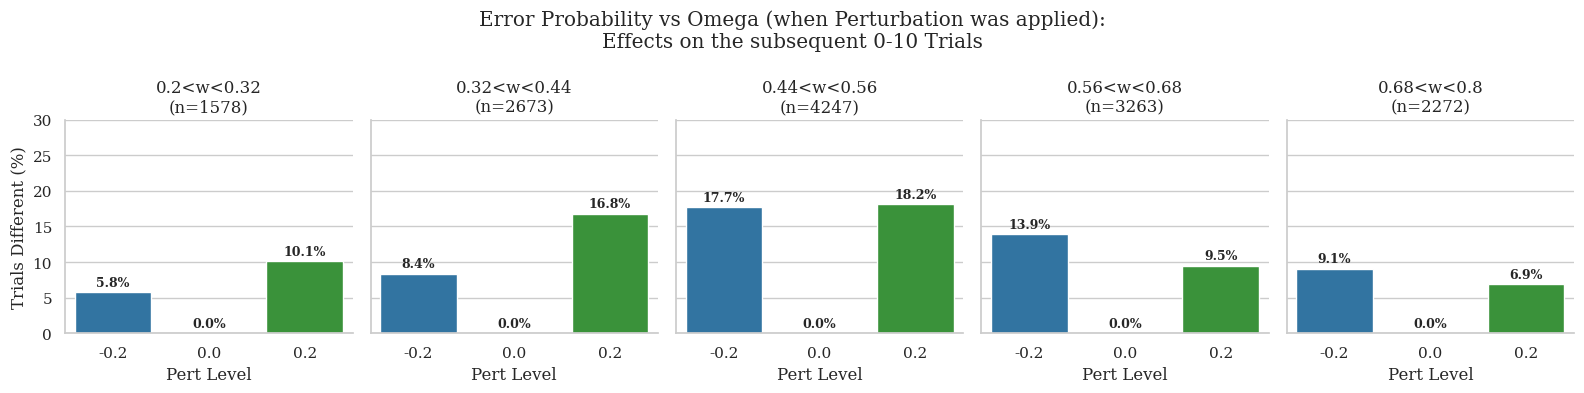

In [126]:
plot_error_probability_by_omega(pert_range, ahead=[0,10])

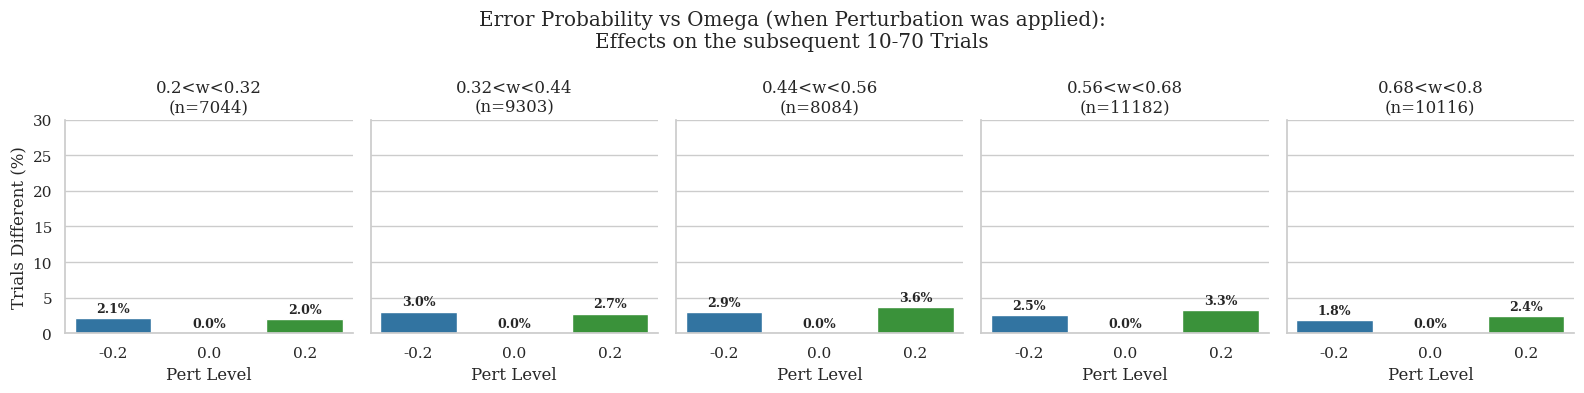

In [127]:
plot_error_probability_by_omega(pert_range, ahead=[10,70])

## Error timecourse

In [115]:
def plot_error_timecourse(pert_range, max_ahead=80, pert_starts=np.arange(1,91,10)):
    fig, ax = plt.subplots(figsize=(12,6))
    perts = sorted(pert_range['pert_value'].unique())
    identifiers = ['monkey', 'session', 'block']
    all_results = []
    for p_val in perts:
        if p_val == 0.0: continue
        for start in pert_starts:
            for d in range(max_ahead):
                target_trial = start + d
                df_step = pert_range.query("pert_start == @start & trial == @target_trial")
                df_w = df_step.query("pert_value == 0.0")
                df_p = df_step.query("pert_value == @p_val")
                aligned = pd.merge(df_w, df_p, on=identifiers, suffixes=('_base', '_pert'))
                if not aligned.empty:
                    is_different = (aligned['dec_base'] != aligned['dec_pert']).mean() * 100
                    all_results.append({
                        'Trial': target_trial,
                        'Relative_Trial': d,
                        'Pert_Start': start,
                        'Pert_Value': p_val,
                        'Error_Prob': is_different
                    })
    if all_results:
        plot_df = pd.DataFrame(all_results)
        sns.lineplot(data=plot_df, x='Trial', y='Error_Prob', hue='Pert_Start', style='Pert_Value', palette=sns.color_palette("husl", 8), ax=ax)

    plt.title("Error Probability Following Perturbations")
    plt.ylabel("Trials Different (%)")
    plt.xlabel("Trial Number")
    plt.ylim(0, 40)
    plt.legend()
    plt.tight_layout()
    plt.show()

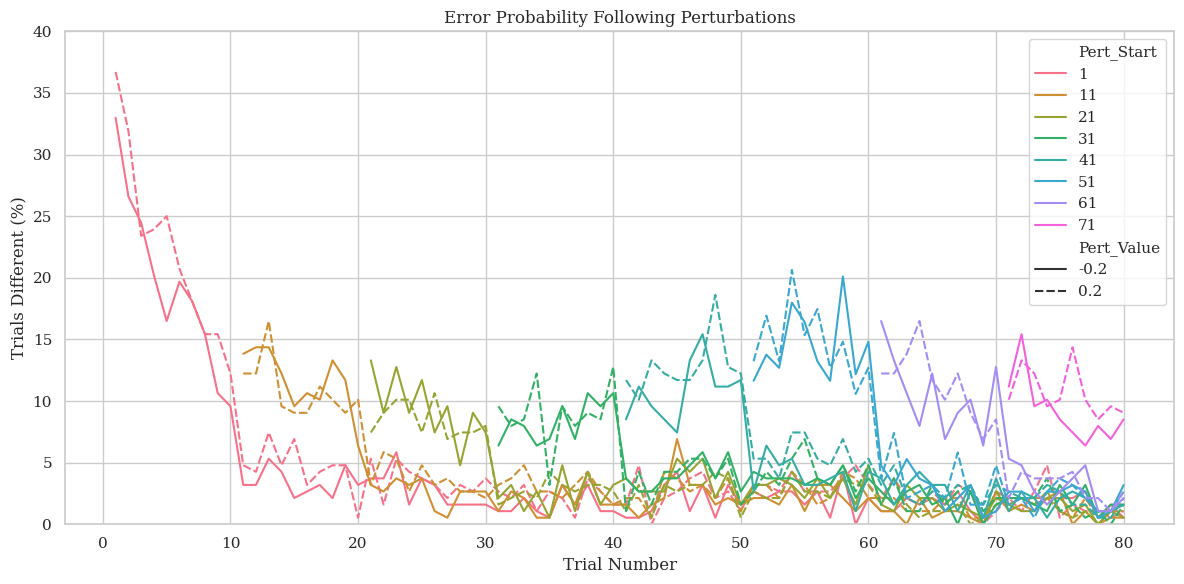

In [116]:
plot_error_timecourse(pert_range)